In [70]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
# Load the data

df = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank_data.csv")

# Drop duration
#df.drop('duration', axis=1, inplace=True)
df.drop('emp.var.rate', axis = 1, inplace= True)
#df.drop('pdays', axis = 1, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [72]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
numerical = df.select_dtypes(include=['int64', 'float64']).columns

for x in numerical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed


In [73]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [74]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [75]:
df.loc[(df.education == 'basic.4y') | (df.education == 'basic.6y') | (df.education == 'basic.9y'),
       'education'] = 'basic'
df.education.value_counts()

import pandas as pd


# Mapping for job clubbing
job_mapping = {
    'housemaid': 'blue-collar',
    'services': 'blue-collar',
    'admin.': 'white-collar',
    'blue-collar': 'blue-collar',
    'technician': 'blue-collar',
    'retired': 'retired',
    'management': 'white-collar',
    'unemployed': 'unemployed',
    'self-employed': 'self-employed',
    'unknown': 'unknown',
    'entrepreneur': 'self-employed',
    'student': 'student'
}

# Create a new column 'job_category' based on the mapping
df['job'] = df['job'].map(job_mapping)

# Display the DataFrame with the new 'job_category' column
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,blue-collar,married,basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,blue-collar,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,blue-collar,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,blue-collar,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes


In [76]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays']

for i in x:
    unknown_count = (df[i] == 'unknown').sum()
    print(f"{i}: {df[i].unique()}, Number of 'unknown': {unknown_count}")


job: ['blue-collar' 'white-collar' 'retired' 'unemployed' 'self-employed'
 'unknown' 'student'], Number of 'unknown': 330
marital: ['married' 'single' 'divorced' 'unknown'], Number of 'unknown': 80
education: ['basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate'], Number of 'unknown': 1731
default: ['no' 'unknown' 'yes'], Number of 'unknown': 8597
housing: ['no' 'yes' 'unknown'], Number of 'unknown': 990
loan: ['no' 'yes' 'unknown'], Number of 'unknown': 990
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20], Number of 'unknown': 0


In [77]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in x:
    mode_value = df[column].mode().iloc[0]  # .mode() returns a Series, use .iloc[0] to get the first mode
    unknown_count = (df[column] == 'unknown').sum()
    print(f"{column} - Mode:{mode_value}, Unknowns: {unknown_count}")

job - Mode:blue-collar, Unknowns: 330
marital - Mode:married, Unknowns: 80
education - Mode:basic, Unknowns: 1731
default - Mode:no, Unknowns: 8597
housing - Mode:yes, Unknowns: 990
loan - Mode:no, Unknowns: 990


In [78]:
# Dropping records with unknowns in job and marital as they are small in number 

import pandas as pd

# Assuming your DataFrame is named df and the columns with 'unknown' values are 'col1', 'col2', 'col3'
columns_with_unknown = ['job', 'marital']

# Create a boolean mask for rows with 'unknown' values in any of the specified columns
filter = df[columns_with_unknown].apply(lambda col: col != 'unknown').all(axis=1)

# Filter the DataFrame to include only rows where the condition is True
df_filtered = df[filter]


# Assuming df2 is your DataFrame
target_column = 'default'

# Filter out instances with 'yes' as there were only 3 records with default = yes
df_filtered = df_filtered[df_filtered[target_column].isin(['no', 'unknown'])]

# Display the filtered DataFrame
df_filtered 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,blue-collar,married,basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,blue-collar,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,blue-collar,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,white-collar,married,basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,blue-collar,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes


In [79]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df_filtered.copy()
df2['job'].replace(['white-collar', 'self-employed', 'retired', 'blue-collar', 'student', 'unemployed', 'unknown'],
                  [1, 2, 3, 4, 5, 6, 7],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace= True)
df2['education'].replace(['university.degree', 'professional.course', 'high.school', 'basic',
'illiterate', 'unknown'], [1, 2, 3, 4, 5, 6], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace= True)
df2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace= True)
df2['loan'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)
df2['housing'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)

# Binary encoding

df2['y'] = df2['y'].map({'no': 0, 'yes': 1})
df2['default'] = df2['default'].map({'no': 1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 1, 'telephone': 0})


df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,1,4,1,2,2,0,5,1,261,1,999,0,1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,3,0,2,2,0,5,1,149,1,999,0,1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,3,1,1,2,0,5,1,226,1,999,0,1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,4,1,2,2,0,5,1,151,1,999,0,1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,3,1,2,1,0,5,1,307,1,999,0,1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,3,1,2,1,1,2,1,11,5,334,1,999,0,1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,2,1,2,2,1,11,5,383,1,999,0,1,94.767,-50.8,1.028,4963.6,0
41185,56,3,1,1,1,1,2,1,11,5,189,2,999,0,1,94.767,-50.8,1.028,4963.6,0
41186,44,4,1,2,1,2,2,1,11,5,442,1,999,0,1,94.767,-50.8,1.028,4963.6,1


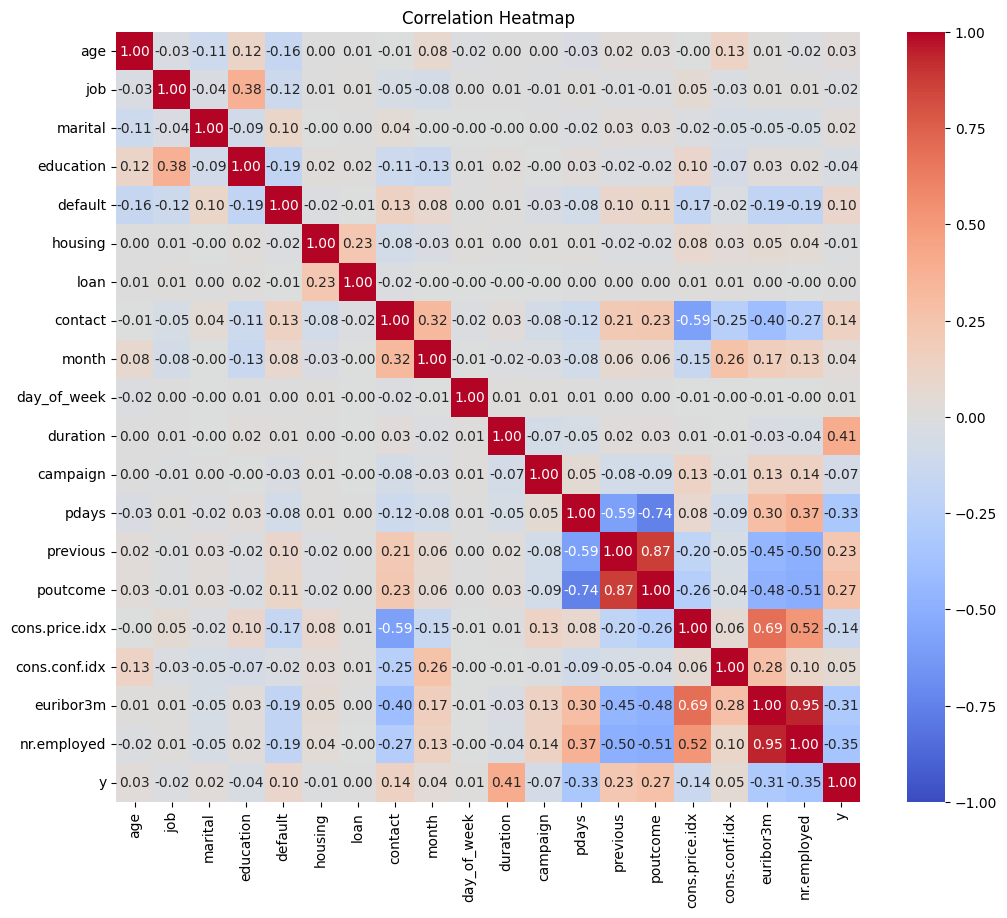

In [80]:
# Correlation analysis

# Q: Should we do Feature selection via correlation analysis?
# Ans: Need to discuss but if we do go ahead with this then
# Check if we need to set a threshold for correlation coeff of say 0.9 and drop columns that have >0.9

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2_standardized is your standardized DataFrame
# You may want to adjust the size of the heatmap based on your needs
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()



In [81]:
# Correlation feature selection

import pandas as pd

# Assuming df is your DataFrame
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Set the correlation threshold
corr_threshold = 0.9

# Create a mask to identify highly correlated features
mask = (corr_matrix.abs() > corr_threshold) & (corr_matrix.abs() < 1.0)

# Identify pairs of highly correlated features
correlated_features = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        correlated_features.add(col)
        correlated_features.update(correlated_cols)

# Remove one feature from each correlated pair
features_to_drop = list(correlated_features)
df_dropped = df2.drop(columns=features_to_drop)
#df_dropped = df_dropped.drop('poutcome', axis=1)
#df_dropped = df_dropped.drop('contact', axis=1)


# Display the filtered DataFrame
print("Original DataFrame shape:", df2.shape)
print("Filtered DataFrame shape:", df_dropped.shape)

for col in df_dropped.columns:
    print(col)

Original DataFrame shape: (40784, 20)
Filtered DataFrame shape: (40784, 18)
age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
cons.price.idx
cons.conf.idx
y


100%|██████████| 2500/2500 [00:07<00:00, 322.36it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


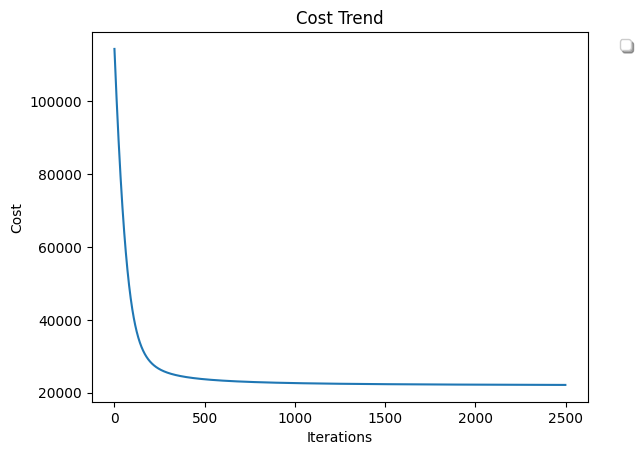

TP: 711 FP: 1536 TN: 5726 FN: 184

Confusion Matrix:
[[5726 1536]
 [ 184  711]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      7262
           1       0.32      0.79      0.45       895

    accuracy                           0.79      8157
   macro avg       0.64      0.79      0.66      8157
weighted avg       0.90      0.79      0.82      8157


Balanced Accuracy: 79.15 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 42850 - 3376 = 39474


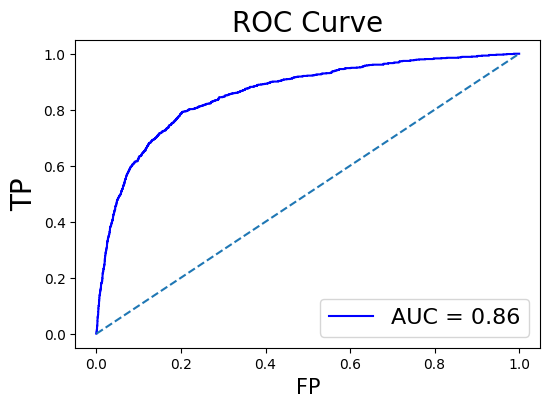

In [104]:
import math
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.model_selection import train_test_split

class LogisticRegression:
        
    def __init__(self, X, y, learning_rate, epsilon, max_iterations):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iterations = max_iterations
        self.theta = None

    def split_data(self, apply_smote):
            if apply_smote == True:
                X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=11)
                sm = SMOTE(random_state=42)
                X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
                return X_train_resampled, X_test, y_train_resampled, y_test
            else:
                 X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=11)
                 return X_train, X_test, y_train, y_test
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X.dot(self.theta)))

    def normalize_train(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X = (X - mean) / std
        X = self.add_X0(X)
        return X, mean, std

    def normalize_test(self, X, mean, std):
        X = (X - mean) / std
        X = self.add_X0(X)
        return X

    def apply_smote(self, X, y):
        smote = SMOTE(random_state=11)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled

    def cost_function(self, X, y, ldpara):
        sig = self.sigmoid(X)
        pred = y * np.log(sig) + (1 - y) * np.log(1 - sig) 
        cost = pred.sum()
        reg_term = (ldpara / (2 * X.shape[0])) * np.sum(self.theta[1:]**2)
        return -cost + reg_term

    def cost_derivative(self, X, y, ldpara):
        sig = self.sigmoid(X)
        grad = (sig - y).dot(X)
        reg_term = 2*(ldpara) * np.concatenate(([0], self.theta[1:]))
        return grad  + reg_term

    def confusion_matrix(self, X, y_true):
        y_pred = self.predict(X)
        cm = confusion_matrix(y_true, y_pred)
        return cm 

    def gradient_descent(self, X, y, ldpara, m):
        errors = []
        prev_error = float('inf')

        for i in tqdm(range(self.max_iterations)):
            regularized_term = (ldpara / m) * np.concatenate(([0], self.theta[1:]))
            self.theta = self.theta - self.learning_rate * (self.cost_derivative(X, y, ldpara) + regularized_term)
            error = self.cost_function(X, y, ldpara)
            diff = prev_error - error

            errors.append(abs(error))

            if diff < self.epsilon:
                print("Model stopped learning")
                break
        return errors

    def predict(self, X):
        return np.around(self.sigmoid(X))

    def predict_proba(self, X):
        return self.sigmoid(X)

    def run_model(self, ldpara = 0, apply_smote = False):
        X_train, X_test, y_train, y_test = self.split_data(apply_smote)
        X_train, mean, std = self.normalize_train(X_train)
        X_test = self.normalize_test(X_test, mean, std)

        self.theta=np.ones(X_train.shape[1], dtype=np.float64)
        errors = self.gradient_descent(X_train, y_train, ldpara, X_train.shape[0])
        self.plot_cost(errors)
        self.metrics_calc(X_test, y_test)
        self.plot_roc(X_test, y_test)

    def run_kfold(self, k, ldpara, apply_smote=False):
        kf = KFold(n_splits=k, shuffle=True, random_state=11)
        fold_count = 1

        for train_idx, test_idx in kf.split(self.X):
            print(f"Fold {fold_count}:")

            X_train, X_test = self.X.iloc[train_idx], self.X.iloc[test_idx]
            y_train, y_test = self.y.iloc[train_idx], self.y.iloc[test_idx]

            if apply_smote:
                X_train, y_train = self.apply_smote(X_train, y_train)

            X_train, mean, std = self.normalize_train(X_train)
            X_test = self.normalize_test(X_test, mean, std)

            self.theta = np.ones(X_train.shape[1], dtype=np.float64)
            self.gradient_descent(X_train, y_train, ldpara, X_train.shape[0])
            
            print("\nTest Set Metrics:")
            self.metrics_calc(X_test, y_test)

            self.plot_roc(X_test, y_test)

            fold_count += 1
            
    def metrics_calc(self, X, y, threshold=0.4):
        probabilities = self.predict_proba(X)
        adjusted_predictions = (probabilities >= threshold).astype(int)

        TP = np.sum((adjusted_predictions == 1) & (y == 1))
        FP = np.sum((adjusted_predictions == 1) & (y == 0))
        TN = np.sum((adjusted_predictions == 0) & (y == 0))
        FN = np.sum((adjusted_predictions == 0) & (y == 1))

        print("TP:", TP, "FP:", FP, "TN:", TN, "FN:", FN)
        cm = confusion_matrix(y, adjusted_predictions)
        print("\nConfusion Matrix:")
        print(cm)
        print('\nClassification report:\n', classification_report(y, adjusted_predictions))
        balanced_acc = balanced_accuracy_score(y, adjusted_predictions)
        print("\nBalanced Accuracy:", round(balanced_acc*100, 2), "%")
        Cfp, Cfn, Btp, Btn = 1, 10, 20, 5
        TC = (Cfp * FP) + (Cfn * FN)
        TB = (Btp * TP) + (Btn * TN) 
        print("\nLet's assume a small cost analysis where we have the following")
        print(f"\n Costs and benefits: Cfp =  {Cfp}, Cfn = {Cfn}, Btp = {Btp}, Btn = {Btn}")
        print(f"\n Net Benefit: Total Benefit - Total Cost = {TB} - {TC} = {TB - TC}" )

    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='Iterations', ylabel='Cost', title='Cost Trend')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
        plt.show()

    def plot_roc(self, X_test, y_test):
        fig, ax = plt.subplots(figsize=(6, 4))

        preds = self.predict_proba(X_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)

        ax.plot(fpr, tpr, 'blue', label='AUC = {:.2f}'.format(roc_auc))
        ax.plot([0, 1], [0, 1], '--')
        ax.set_title('ROC Curve', fontsize=20)
        ax.set_ylabel('TP', fontsize=20)
        ax.set_xlabel('FP', fontsize=15)
        ax.legend(loc='lower right', prop={'size': 16})
        plt.show()


    
# Your data preparation and instantiation of LogisticRegression
X = df_dropped.drop('y', axis=1)
y = df_dropped['y']
lr = LogisticRegression(X, y, learning_rate=0.1e-5, epsilon=0.00005, max_iterations=2500)

# Normal run with SMOTE
lr.run_model(ldpara = 0, apply_smote = True)



Fold 1:


100%|██████████| 2500/2500 [00:08<00:00, 301.23it/s]



Test Set Metrics:
TP: 711 FP: 1522 TN: 5740 FN: 184

Confusion Matrix:
[[5740 1522]
 [ 184  711]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      7262
           1       0.32      0.79      0.45       895

    accuracy                           0.79      8157
   macro avg       0.64      0.79      0.66      8157
weighted avg       0.90      0.79      0.82      8157


Balanced Accuracy: 79.24 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 42920 - 3362 = 39558


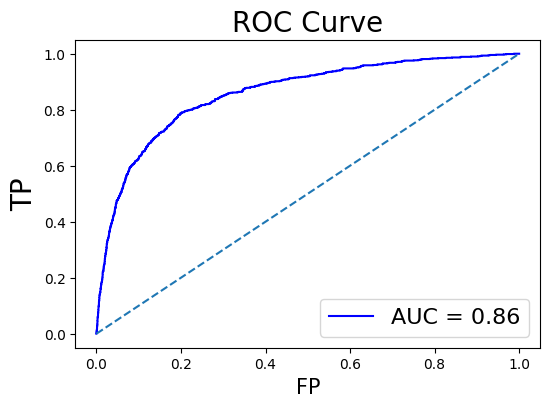

Fold 2:


100%|██████████| 2500/2500 [00:08<00:00, 298.29it/s]



Test Set Metrics:
TP: 756 FP: 1424 TN: 5767 FN: 210

Confusion Matrix:
[[5767 1424]
 [ 210  756]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.88      7191
           1       0.35      0.78      0.48       966

    accuracy                           0.80      8157
   macro avg       0.66      0.79      0.68      8157
weighted avg       0.89      0.80      0.83      8157


Balanced Accuracy: 79.23 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 43955 - 3524 = 40431


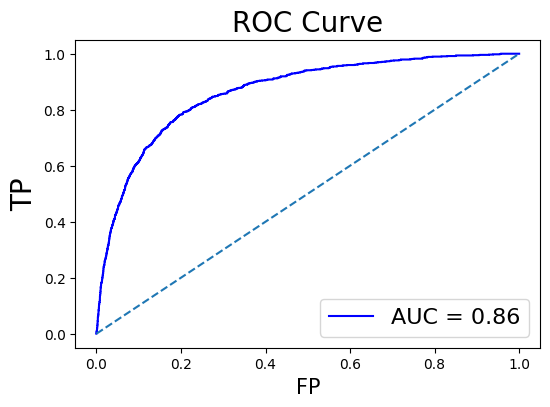

Fold 3:


100%|██████████| 2500/2500 [00:08<00:00, 301.01it/s]



Test Set Metrics:
TP: 737 FP: 1451 TN: 5738 FN: 231

Confusion Matrix:
[[5738 1451]
 [ 231  737]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      7189
           1       0.34      0.76      0.47       968

    accuracy                           0.79      8157
   macro avg       0.65      0.78      0.67      8157
weighted avg       0.89      0.79      0.82      8157


Balanced Accuracy: 77.98 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 43430 - 3761 = 39669


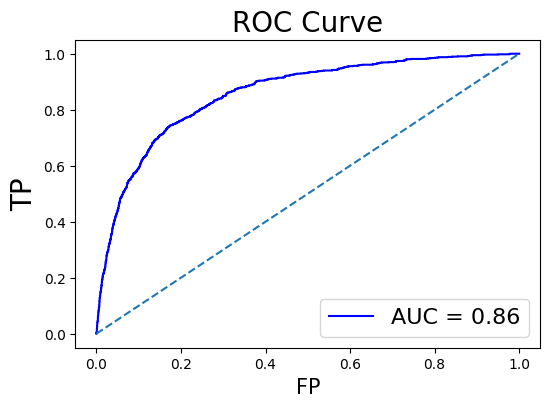

Fold 4:


100%|██████████| 2500/2500 [00:09<00:00, 274.32it/s]



Test Set Metrics:
TP: 694 FP: 1379 TN: 5878 FN: 206

Confusion Matrix:
[[5878 1379]
 [ 206  694]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      7257
           1       0.33      0.77      0.47       900

    accuracy                           0.81      8157
   macro avg       0.65      0.79      0.67      8157
weighted avg       0.90      0.81      0.84      8157


Balanced Accuracy: 79.05 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 43270 - 3439 = 39831


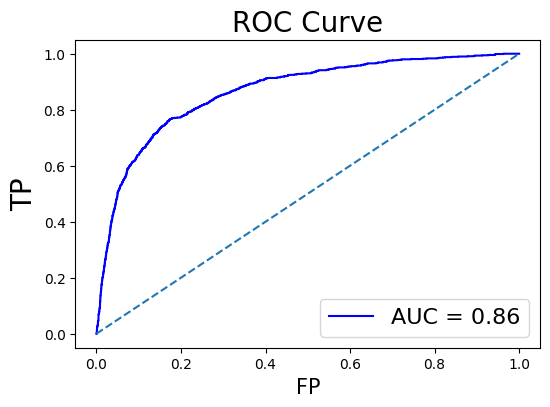

Fold 5:


100%|██████████| 2500/2500 [00:08<00:00, 291.31it/s]



Test Set Metrics:
TP: 676 FP: 1485 TN: 5806 FN: 189

Confusion Matrix:
[[5806 1485]
 [ 189  676]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.87      7291
           1       0.31      0.78      0.45       865

    accuracy                           0.79      8156
   macro avg       0.64      0.79      0.66      8156
weighted avg       0.90      0.79      0.83      8156


Balanced Accuracy: 78.89 %

Let's assume a small cost analysis where we have the following

 Costs and benefits: Cfp =  1, Cfn = 10, Btp = 20, Btn = 5

 Net Benefit: Total Benefit - Total Cost = 42550 - 3375 = 39175


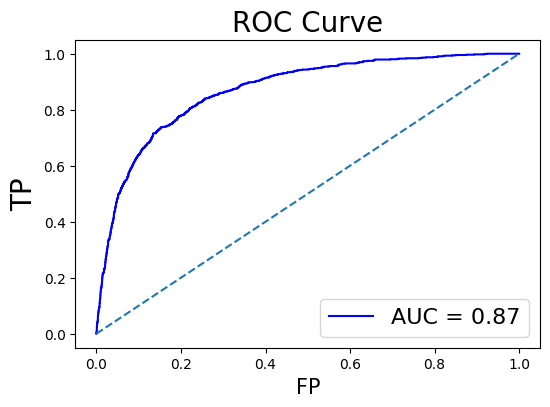

In [105]:
# Run KFold with SMOTE
lr.run_kfold(k =5, ldpara = 0, apply_smote=True)
